In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cmocean

import numpy as np
import xarray as xr

In [6]:
inputdata = '/glade/p/cesmdata/cseg/inputdata/ocn/pop/gx1v6/forcing'

# note on the scale factor
# units of Fe dataset are µmol/m^2/d --> nmol/cm^2/s
# (µmol/m^2/d)(1d / 86400s)(10^9 nmol/mol)(1 mol/10^6 µmol)(1 m^2/10^4 cm^2)---> nmol/cm^2/s
# 1e-4 / 86400. * 1e9 * 1e-6 = 1.1574074074074074e-06
scale_factor = 1.1574e-6

grid_file = '/glade/work/mclong/grids/POP_gx1v7.nc'

feventflux_file = f'{inputdata}/feventflux_gx1v6_5gmol_cesm1_97_2017.nc'
ds = xr.open_dataset(feventflux_file)
ds = ds.rename({'FESEDFLUXIN':'FEVENTFLUXIN'})

fesedflux_file = f'{inputdata}/fesedfluxTot_gx1v6_cesm2_2018_c180618.nc'
ds = xr.merge((ds,xr.open_dataset(fesedflux_file)))
ds = ds.rename({'x':'nlon','y':'nlat','z':'z_t'})

ds['FESEDFLUXIN'] = ds.FESEDFLUXIN*scale_factor
ds['FEVENTFLUXIN'] = ds.FEVENTFLUXIN*scale_factor

ds.FESEDFLUXIN.attrs['units'] = 'nmol/cm^2/s'
ds.FEVENTFLUXIN.attrs['units'] = 'nmol/cm^2/s'

ds = xr.merge((ds,xr.open_dataset(grid_file,decode_coords=False)))


In [8]:
(ds.FEVENTFLUXIN * ds.TAREA).sum() * 1e-9 * 365 * 86400 * 1e-9

<xarray.DataArray ()>
array(5.047964)

In [10]:
(ds.FESEDFLUXIN * ds.TAREA).sum() * 1e-9 * 365 * 86400 * 1e-9

<xarray.DataArray ()>
array(19.952493)

In [4]:
ds = xr.open_dataset('/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.001/ocn/proc/tseries/month_1/b.e21.BHIST.f09_g17.CMIP6-historical.001.pop.h.Fe_RIV_FLUX.185001-201412.nc',
                     decode_times = False)
ds

<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 1980, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                     (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
  * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                     (z_w) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * lat_aux_grid            (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                   (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
    ULONG                   (nlat, nlon) float64 ...
    ULAT                    (nlat, nlon) float64 ...
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
  *

In [8]:
riv_in = (ds.Fe_RIV_FLUX * ds.TAREA).sum(['nlat','nlon']).compute()*1e-9*1e-9*365.*86400.

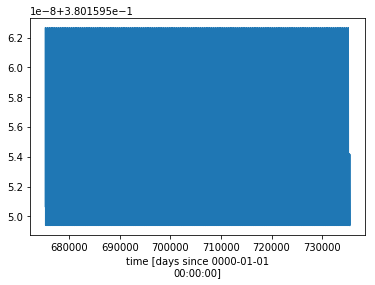

In [9]:
riv_in.plot()

In [10]:
riv_in.mean()

<xarray.DataArray ()>
array(0.38016)